# **TikTok Project**


**The goal** of this step is to construct a dataframe in Python, perform a cursory inspection of the provided dataset, and inform the client the findings. As this project was done as part of the course, it follows Google's **PACE** workflow 
<br/>

*This activity has three parts:*

**Part 1:** Understand the situation
* Prepare to understand and organize the provided dataset

**Part 2:** Understand the data
* Create a pandas dataframe for data learning and future exploratory data analysis (EDA) and statistical activities
* Compile summary information about the data to inform next steps

**Part 3:** Understand the variables
* Use insights from the examination of the summary data to guide deeper investigation into variables
<br/>

## **PACE: Plan**

### **Task 1. Understand the situation**
To get a grip on the dataset and the situation, read in the data, viewing the data dictionary, and exploring 
the dataset to identify key variables for the stakeholder

## **PACE: Analyze**
### **Task 2a. Imports and data loading**

In [31]:
# Import packages
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

In [3]:
# Display and examine the first ten rows of the dataframe
data.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [ ]:
Observation: Looking at the first rows of the dataset show it contains a collection of categorical, text, and numerical data. Each row
represents a distinct TikTok video that presents either a claim or an opinion and the accompanying metadata about that video.

Key columns include:
- Text data: video transcription and commenter information
- Categorical features: claim_status (target variable), verified status, author ban status
- Numerical features: engagement metrics (video_view_count, video_like_count, video_share_count, video_download_count, video_comment_count)
This structure supports binary classification to automate prioritization of user reports for moderation

In [4]:
# Get summary info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [ ]:
The dataframe contains five float64s, three int64s, and four objects. There are 19,382 observations, but some of the variables are missing values, including claim status, the video
transcripton, and all of the count variables.

In [9]:
# Get summary statistics
data.drop(columns=['#', 'video_id']).describe().round(2)

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.00,19084.00,19084.00,19084.00,19084.00,19084.00
mean,32.42,254708.56,84304.64,16735.25,1049.43,349.31
std,16.23,322893.28,133420.55,32036.17,2004.30,799.64
min,5.00,20.00,0.00,0.00,0.00,0.00
25%,18.00,4942.50,810.75,115.00,7.00,1.00
50%,32.00,9954.50,3403.50,717.00,46.00,9.00
75%,47.00,504327.00,125020.00,18222.00,1156.25,292.00
max,60.00,999817.00,657830.00,256130.00,14994.00,9599.00


In [ ]:
Many of the count variables seem to have outliers at the high end of the distribution. They have very large standard deviations and maximum values that are very high compared to
their quartile values

### **Task 2c. Understand the data - Investigate the variables**

Understand key variables and their distributions for claim vs. opinion classification

In [35]:
# The different values for claim status and how many of each are in the data?
data['claim_status'].value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

The target variable is nearly balanced: 9,608 claims (50.7%) vs. 9,476 opinions (49.3%).
No major class imbalance concerns for initial modeling.

Next, examine the engagement trends associated with each different claim status.

In [36]:
claims = data[data['claim_status'] == 'claim']
mean_val_claims = claims['video_view_count'].mean()
print('Mean view count claims:', round(mean_val_claims, 2))

median_val_claims = claims['video_view_count'].median()
print('Median view count claims:', round(median_val_claims, 2))

opinions = data[data['claim_status'] == 'opinion']
mean_val_opinions = opinions['video_view_count'].mean()
print('Mean view count opinion:', round(mean_val_opinions, 2))

median_val_opinions = opinions['video_view_count'].median()
print('Median view count opinion:', round(median_val_opinions, 2))

Mean view count claims: 501029.45
Median view count claims: 501555.0
Mean view count opinion: 4956.43
Median view count opinion: 4953.0


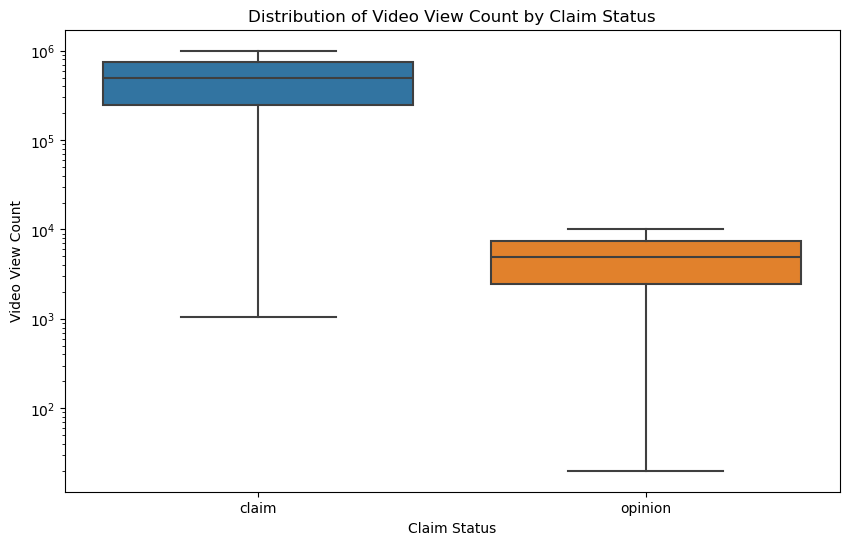

In [26]:
# Boxplot of video_view_count by claim_status
plt.figure(figsize=(10, 6))
sns.boxplot(x='claim_status', y='video_view_count', data=data)
plt.title('Distribution of Video View Count by Claim Status')
plt.ylabel('Video View Count')
plt.xlabel('Claim Status')
plt.yscale('log')  # Critical! Use log scale due to huge difference
plt.show()

In [ ]:
Videos classified as claims receive dramatically higher views (~501k median) compared to opinions (~5k median).
Within each class, mean and median are very close, indicating symmetric distributions and minimal skew.
This suggests video_view_count will be a strong predictor for classification.

Boxplot (log scale) confirms dramatic separation:
- Claim videos: median ~501k views, wide spread with high outliers
- Opinion videos: median ~5k views, much tighter distribution

This strong class separation indicates `video_view_count` will be a highly predictive feature for classification — 
 potentially the most important single variable.                                                                                              

In [33]:
# Get counts for each group combination of claim status and author ban status
data.groupby(['claim_status', 'author_ban_status']).count()[['#']]

#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

Videos labeled as **claims** are much more likely to come from banned or under-review authors:
- Claims: 27.7% from banned/under-review authors (1,439 banned + 1,603 under review out of 9,608)
- Opinions: only 7.0% from banned/under-review authors (196 banned + 463 under review out of 9,476)

This strong association suggests `author_ban_status` will be a highly predictive feature for distinguishing claims 
from opinions — banned/under-review authors disproportionately post content flagged as claims.

Potential modeling implication: This feature could help the model learn moderation patterns early.s, now focusing on `author_ban_status`.

Calculate the median video share count of each author ban status.

In [44]:
#deep diving into author_ban_status

data.groupby(['author_ban_status']).agg(
{'video_view_count': ['count', 'mean', 'median'],
'video_like_count': ['count', 'mean', 'median'],
'video_share_count': ['count', 'mean', 'median']
})

video_view_count                       video_like_count  \
                             count       mean     median            count   
author_ban_status                                                           
active                       15383 215,927.04   8,616.00            15383   
banned                        1635 445,845.44 448,201.00             1635   
under review                  2066 392,204.84 365,245.50             2066   

                                        video_share_count                      
                        mean     median             count      mean    median  
author_ban_status                                                              
active             71,036.53   2,222.00             15383 14,111.47    437.00  
banned            153,017.24 105,573.00              1635 29,998.94 14,468.00  
under review      128,718.05  71,204.50              2066 25,774.70  9,444.00

In [ ]:
### Engagement Metrics by Author Ban Status
Banned and under-review authors drive disproportionately high engagement:
Key insights:
- Banned authors (only ~9% of videos) generate the highest engagement: median views ~448k (vs. ~9k for active).
- Under-review authors also show elevated metrics (median views ~365k).
- Active authors dominate volume but have much lower typical engagement.

This pattern aligns with earlier findings: claim videos (which receive far more views) are 
over-represented among banned/under-review authors.

**Modeling implication**: `author_ban_status` is likely to be one of the strongest predictors, 
potentially rivaling or complementing `video_view_count` itself.

Created three normalized features to account for view volume differences:
- `likes_per_view` = likes / views
- `comments_per_view` = comments / views
- `shares_per_view` = shares / views
These ratios measure engagement **intensity** independent of raw view count.

In [40]:
# Create a likes_per_view column
data['likes_per_view'] = data['video_like_count'] / data['video_view_count']

# Create a comments_per_view column
data['comments_per_view'] = data['video_comment_count'] /data['video_view_count']

# Create a shares_per_view column
data['shares_per_view'] = data['video_share_count'] / data['video_view_count']

Use `groupby()` to compile the information in each of the three newly created features for each combination of categories of claim status and author ban status, then use `agg()` to calculate the count, the mean, and the median of each group.

In [41]:
data.groupby(['claim_status', 'author_ban_status']).agg(
{'likes_per_view': ['count', 'mean', 'median'],
'comments_per_view': ['count', 'mean', 'median'],
'shares_per_view': ['count', 'mean', 'median']})

likes_per_view             comments_per_view  \
                                        count mean median             count   
claim_status author_ban_status                                                
claim        active                      6566 0.33   0.33              6566   
             banned                      1439 0.35   0.36              1439   
             under review                1603 0.33   0.32              1603   
opinion      active                      8817 0.22   0.22              8817   
             banned                       196 0.21   0.20               196   
             under review                 463 0.23   0.23               463   

                                           shares_per_view              
                               mean median           count mean median  
claim_status author_ban_status                                          
claim        active            0.00   0.00            6566 0.07   0.05  
             banned            0.00   0.00            1439 0.07   0.05  
             under review      0.00   0.00            1603 0.07   0.05  
opinion      active            0.00   0.00            8817 0.04   0.03  
             banned            0.00   0.00             196 0.04   0.03  
             under review      0.00   0.00             463 0.04   0.04

Key insights:
- **Likes per view** are consistently **higher for claim videos** (~0.33–0.36) than opinion videos (~0.20–0.23), regardless of author ban status.
  - Claim videos generate ~50–70% higher like rates even after normalizing for views.
- Banned authors posting claims show the highest median like ratio (0.36).
- **Comments per view** are near zero across all groups → low predictive value (typical for social platforms).
- **Shares per view** follow the same pattern: ~0.05 for claims vs. ~0.03–0.04 for opinions.

**Modeling implication**:  
`likes_per_view` and `shares_per_view` provide strong discriminatory power beyond raw view counts. These engineered ratios capture engagement **quality**, helping distinguish claims (which tend to provoke stronger reactions per viewer) from opinions.

### **Summary for the management**

* **Percentage of claims and opinions**: Based on the TikTok claims classification dataset, claims make up approximately 50.35% of the data (9,608 videos), while opinions comprise 49.65% (9,476 videos). The classes are nearly balanced.

* **Factors correlating with a video's claim status**: 
  - **Engagement metrics**: Claim videos strongly correlate with higher raw engagement, including video view count (median ~501k for claims vs. ~5k for opinions), likes, shares, downloads, and comments. Normalized ratios (e.g., likes per view ~0.33–0.36 for claims vs. ~0.20–0.23 for opinions; shares per view ~0.05 for claims vs. ~0.03–0.04 for opinions) also show stronger per-viewer reactions for claims.
  - **Author ban status**: Claims are over-represented among banned or under-review authors (28% of claims vs. 7% of opinions from banned/under-review authors).
  - **Other potential factors**: Transcript text length and verified status may show weaker correlations, but engagement and author status are the dominant predictors.

* **Factors correlating with a video's engagement level**:
  - **Claim status**: Claim videos receive dramatically higher engagement across all metrics (e.g., ~100x more views, higher like/share rates) compared to opinion videos.
  - **Author ban status**: Banned and under-review authors generate the highest engagement (median views ~448k for banned vs. ~9k for active; similar patterns in likes and shares).
  - **Interplay**: The combination of claim status and banned authors drives the most intense engagement, suggesting controversial or high-risk content amplifies visibility and interactions.
